# Prueba de Concepto: Análisis del Conflicto de Ucrania 2022
Autor: Diego Sánchez Escribano

Fecha: 9 de julio de 2025

## 1. Objetivo
Para esta prueba de concepto se utilizará la guerra de Ucrania, iniciada en 2022. Se establece como "tiempo cero" (t-0) la fecha del 24 de febrero de 2022. Este día marca un punto de inflexión fáctico con la invasión del territorio ucraniano por parte de las fuerzas armadas rusas. El período de análisis para la recolección de datos comprenderá los 24 meses inmediatamente anteriores a esta fecha: del 24 de febrero de 2020 al 23 de febrero de 2022.

## 2. Configuración y adquisición de datos
Los datos para la PoC se obtuvieron de Yahoo Finance y de Investing.com, los cuales se cargaron como un CSV. Se toman datos de los siguientes indicadores entre el 24 de febrero de 2020 y el 23 de febrero de 2022, momento en el que se inició la guerra de Ucrania:

- Rublo
- Gas
- Brent
- Trigo
- VIX
- Gold
- DAX
- Stoxx

Una vez recopilados todos los datos, se combinan en un solo DataFrame para su análisis.

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# --- 1. Definición de Parámetros ---

START_DATE = "2020-02-24"
END_DATE = "2022-02-23"  


# Creamos un diccionario con todos los tickers que queremos de Yahoo Finance
TICKERS = {
    "rub": "RUB=X",
    "gas": "TTF=F",
    "brent": "BZ=F",
    "trigo": "ZW=F",
    "dax": "^GDAXI",
    "stoxx": "^STOXX50E",
    "vix": "^VIX",
    "gold": "GC=F"
}

# --- 2. Carga del Índice MOEX  ---

try:
    moex_df = pd.read_csv("data/moex_ucrania.csv")
    print("✅ Índice MOEX cargado correctamente.")
    # print(moex_df.head()) # Descomentar para inspeccionar
except FileNotFoundError:
    print("❌ ERROR: No se encontró el archivo 'data/moex_ucrania.csv'. Asegúrate de que el archivo existe en esa carpeta.")

# --- 3. Descarga de Datos desde yfinance ---

# Usamos un diccionario para almacenar todos los dataframes descargados
dataframes = {}

for name, ticker in TICKERS.items():
    print(f"Descargando datos para {name} ({ticker})...")
    df = yf.download(ticker, start=START_DATE, end=END_DATE)
    if not df.empty:
        dataframes[name] = df
        print(f"✅ Datos para {name} descargados. {len(df)} filas.")
    else:
        print(f"⚠️ No se encontraron datos para {name} ({ticker}).")

# Acceso a un dataframe (ejemplo: Rublo)
print("\n--- Inspección Rápida de un DataFrame Descargado (Rublo) ---")
if 'rub' in dataframes:
    rub_df = dataframes['rub']
    print(rub_df.head())
    date_close = rub_df[["Close"]]
    print(date_close.head())

✅ Índice MOEX cargado correctamente.
Descargando datos para rub (RUB=X)...


/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para rub descargados. 522 filas.
Descargando datos para gas (TTF=F)...
✅ Datos para gas descargados. 505 filas.
Descargando datos para brent (BZ=F)...


[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para brent descargados. 505 filas.
Descargando datos para trigo (ZW=F)...


[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para trigo descargados. 505 filas.
Descargando datos para dax (^GDAXI)...


[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para dax descargados. 509 filas.
Descargando datos para stoxx (^STOXX50E)...


[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para stoxx descargados. 507 filas.
Descargando datos para vix (^VIX)...


[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/2283896491.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)


✅ Datos para vix descargados. 505 filas.
Descargando datos para gold (GC=F)...


[*********************100%***********************]  1 of 1 completed

✅ Datos para gold descargados. 505 filas.

--- Inspección Rápida de un DataFrame Descargado (Rublo) ---
Price           Close       High        Low       Open Volume
Ticker          RUB=X      RUB=X      RUB=X      RUB=X  RUB=X
Date                                                         
2020-02-24  64.054100  65.779999  64.041901  64.041901      0
2020-02-25  65.323700  65.554001  64.673500  65.323700      0
2020-02-26  65.278397  65.700996  64.950203  65.278397      0
2020-02-27  65.451302  66.383003  65.404503  65.449600      0
2020-02-28  66.269096  67.610001  66.269096  66.269096      0
Price           Close
Ticker          RUB=X
Date                 
2020-02-24  64.054100
2020-02-25  65.323700
2020-02-26  65.278397
2020-02-27  65.451302
2020-02-28  66.269096


## 3. Limpieza y unificación de los datos
Antes de ser analizados se procede a limpiar los datos obtenidos. Dado que las fechas de apertura y cierre de los mercados no siempre coindice, hay un desfase entre las fechas de los datos descargados.

In [2]:
from pandas import DataFrame

print("Iniciando Limpieza y Unificación de Datos...")

# --- 1. Definición de Nombres de Columna ---
# Creamos un diccionario para mapear nuestros nombres cortos a los nombres finales
COLUMN_NAMES = {
    "moex": "moex",
    "rub": "rub",
    "brent": "brent",
    "vix": "vix",
    "gold": "gold",
    "dax": "dax",
    "stoxx": "stoxx",
    "trigo": "trigo",
    "gas": "gas"
}

# --- 2. Preparar la lista para guardar los DataFrames limpios ---
cleaned_dfs = []

# --- 3. Limpiar el DataFrame del MOEX ---
moex_df['Price'] = moex_df['Price'].str.replace(',', '', regex=False)
moex_df['Price'] = moex_df['Price'].astype(float)
moex_df['Date'] = pd.to_datetime(moex_df['Date'])
moex_df = moex_df.set_index('Date')
moex_clean = moex_df[['Price']].rename(columns={'Price': COLUMN_NAMES['moex']})
cleaned_dfs.append(moex_clean)
print(f"✅ DataFrame de '{COLUMN_NAMES['moex']}' limpiado y estandarizado.")

# --- 4. Limpiar todos los DataFrames de yfinance en un bucle ---
for name, df in dataframes.items():
    df.index = pd.to_datetime(df.index)
    final_col_name = COLUMN_NAMES[name] 
    close_values = df['Close'].values
    cleaned_df = pd.DataFrame(data=close_values, index=df.index, columns=[final_col_name])
    cleaned_dfs.append(cleaned_df)
    print(f"✅ DataFrame de '{final_col_name}' limpiado y estandarizado.")

# --- 5. Unir todos los DataFrames limpios en una única tabla maestra ---
master_df = pd.concat(cleaned_dfs, axis=1)

# --- 6. Manejar los valores nulos (NaN) ---
master_df = master_df.fillna(method='ffill')
master_df = master_df.fillna(method='bfill')

# --- 7. Inspección Final ---
print("\n--- Proceso de Unificación Completado ---")
print("Dimensiones de la tabla maestra:", master_df.shape)
print("\nPrimeras 5 filas de la tabla maestra con nombres finales:")
print(master_df.head())

Iniciando Limpieza y Unificación de Datos...
✅ DataFrame de 'moex' limpiado y estandarizado.
✅ DataFrame de 'rub' limpiado y estandarizado.
✅ DataFrame de 'gas' limpiado y estandarizado.
✅ DataFrame de 'brent' limpiado y estandarizado.
✅ DataFrame de 'trigo' limpiado y estandarizado.
✅ DataFrame de 'dax' limpiado y estandarizado.
✅ DataFrame de 'stoxx' limpiado y estandarizado.
✅ DataFrame de 'vix' limpiado y estandarizado.
✅ DataFrame de 'gold' limpiado y estandarizado.

--- Proceso de Unificación Completado ---
Dimensiones de la tabla maestra: (523, 9)

Primeras 5 filas de la tabla maestra con nombres finales:
               moex        rub    gas      brent   trigo           dax  \
Date                                                                     
2020-02-24  3002.68  64.054100  9.045  56.299999  536.25  13035.240234   
2020-02-25  3002.68  65.323700  9.005  54.950001  539.00  12790.490234   
2020-02-26  3017.42  65.278397  9.070  53.430000  540.25  12774.879883   
2020-02-27

/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/3874552290.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='ffill')
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_55796/3874552290.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='bfill')


## 4. Gráficos de los índices normalizados
Para poder analizar los datos visualmente, se crea un gráfico con la evolución de los precios de los mercados, normalizados en Base 100 para poder compararlos correctamente y sacar conclusiones.

--- Primeras 5 filas de la tabla normalizada (todas empiezan en 100) ---
                  moex         rub         gas       brent       trigo  \
Date                                                                     
2020-02-24  100.000000  100.000000  100.000000  100.000000  100.000000   
2020-02-25  100.000000  101.982074   99.557767   97.602134  100.512821   
2020-02-26  100.490895  101.911348  100.276392   94.902311  100.745921   
2020-02-27   97.107917  102.181284   98.065227   92.682062   98.694639   
2020-02-28   92.753141  103.458009   98.120508   89.733572   98.648019   

                   dax       stoxx         vix        gold  
Date                                                        
2020-02-24  100.000000  100.000000  100.000000  100.000000  
2020-02-25   98.122397   97.931185  111.266479   98.475245  
2020-02-26   98.002642   98.072905  110.107865   98.062663  
2020-02-27   94.877116   94.735167  156.452252   98.062663  
2020-02-28   91.216958   91.269415  160.24

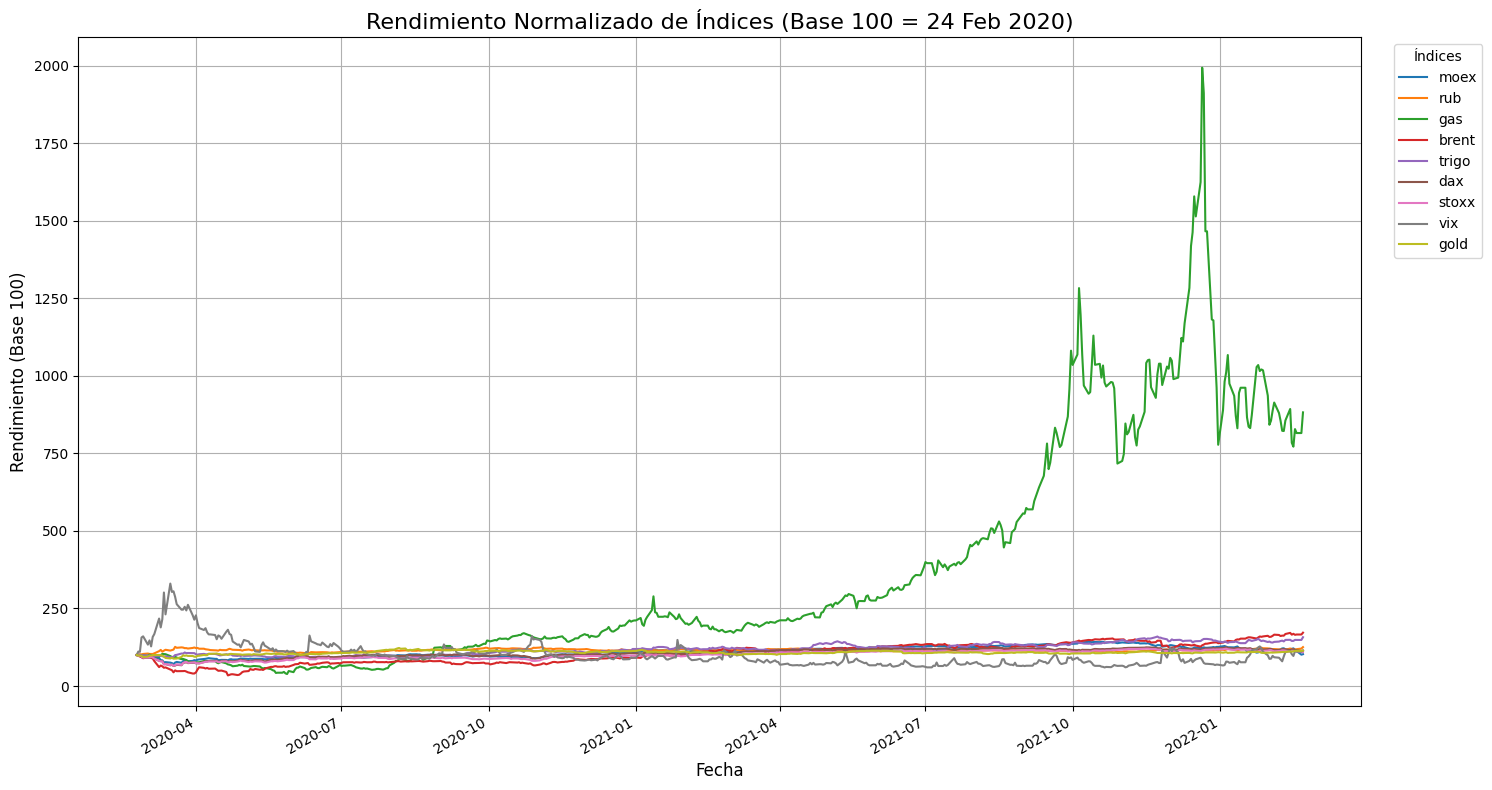

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Crear el DataFrame Normalizado ---

# Tomamos la primera fila de nuestra tabla como el punto de partida (base 100)
# .iloc[0] selecciona la primera fila por su posición
base_values = master_df.iloc[0]

# Dividimos cada valor en la tabla por su valor base y multiplicamos por 100
normalized_df = (master_df / base_values) * 100

print("--- Primeras 5 filas de la tabla normalizada (todas empiezan en 100) ---")
print(normalized_df.head())


# --- Paso 2: Graficar TODOS los índices juntos ---

# Creamos la figura y los ejes para tener más control
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos el DataFrame normalizado completo. Pandas se encarga de pintar una línea por cada columna.
normalized_df.plot(ax=ax, linewidth=1.5)

# --- Paso 3: Añadir los títulos ---

ax.set_title('Rendimiento Normalizado de Índices (Base 100 = 24 Feb 2020)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
# Movemos la leyenda fuera del área del gráfico para que no tape las líneas
ax.legend(title='Índices', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajusta el layout para que la leyenda no se corte
plt.tight_layout()
plt.show()

### 4.1 Gráfico con los índices predictores del evento
A continuación, se aislan sucesivamente distintos índices para eliminar ruido y poder ver con mayor claridad movimientos significativos de algunos índices.

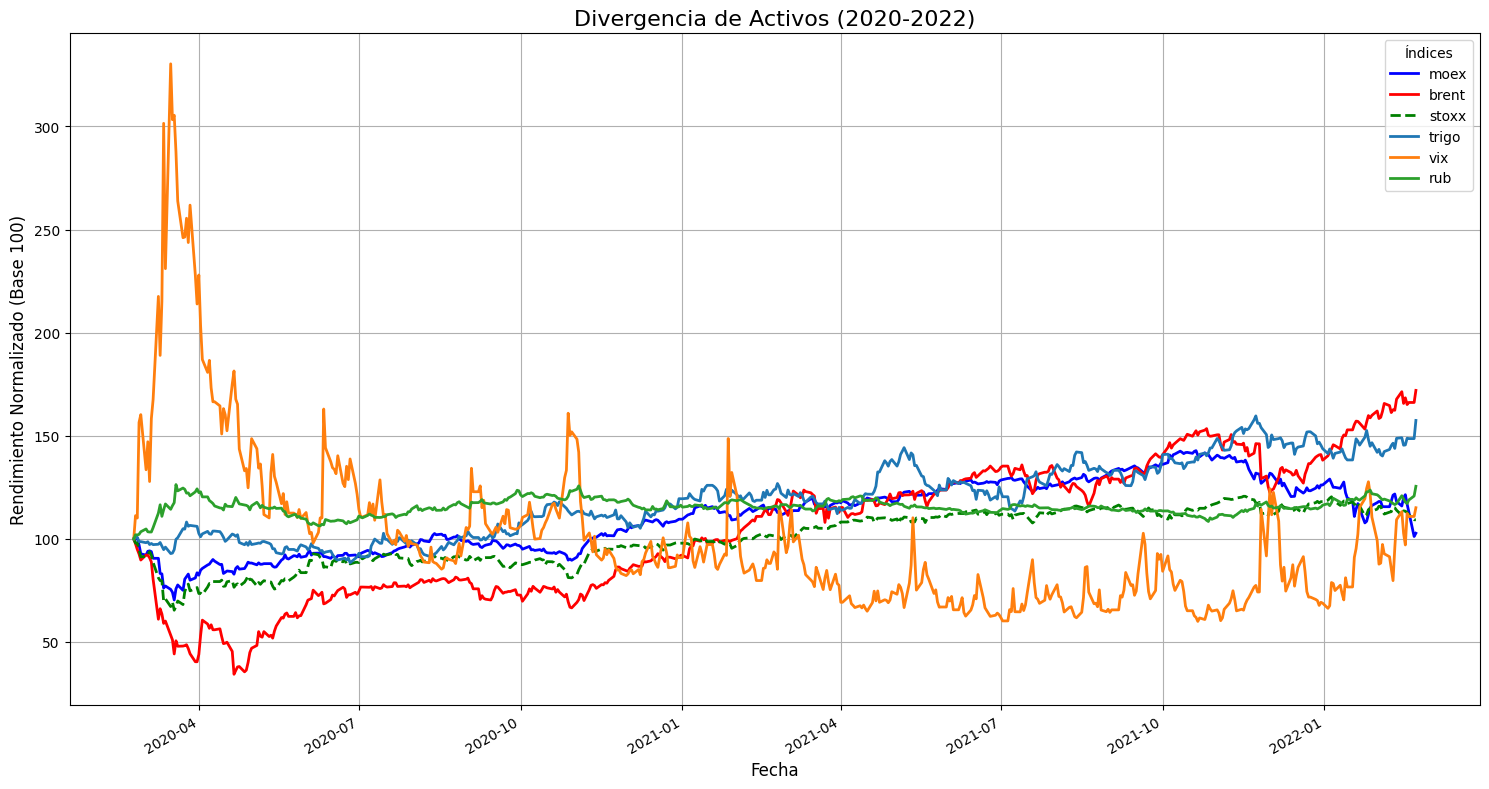

In [4]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['moex', 'brent', 'stoxx', 'trigo', 'vix', 'rub']

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos (2020-2022)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

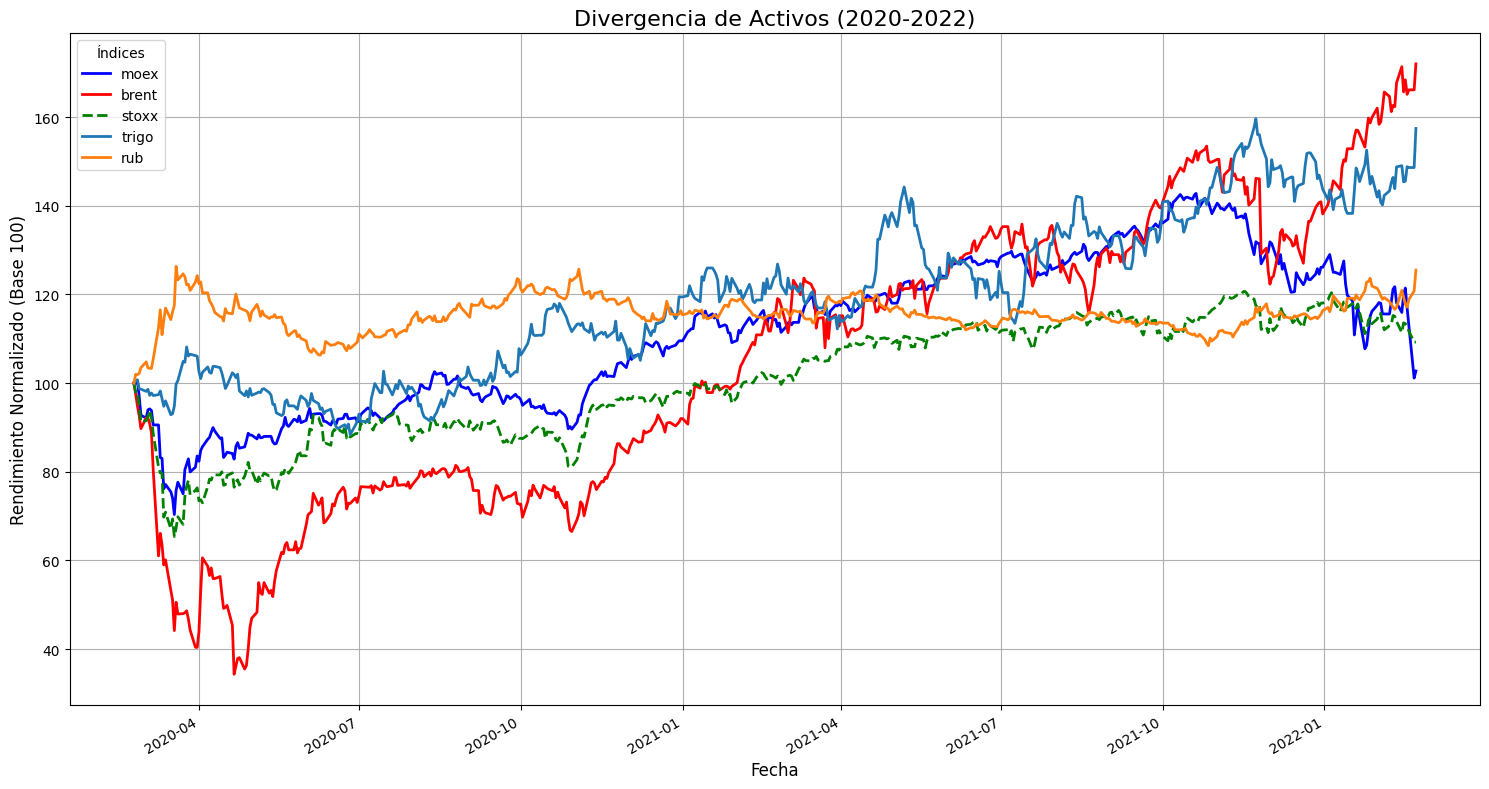

In [5]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['moex', 'brent', 'stoxx', 'trigo', 'rub']

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos (2020-2022)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

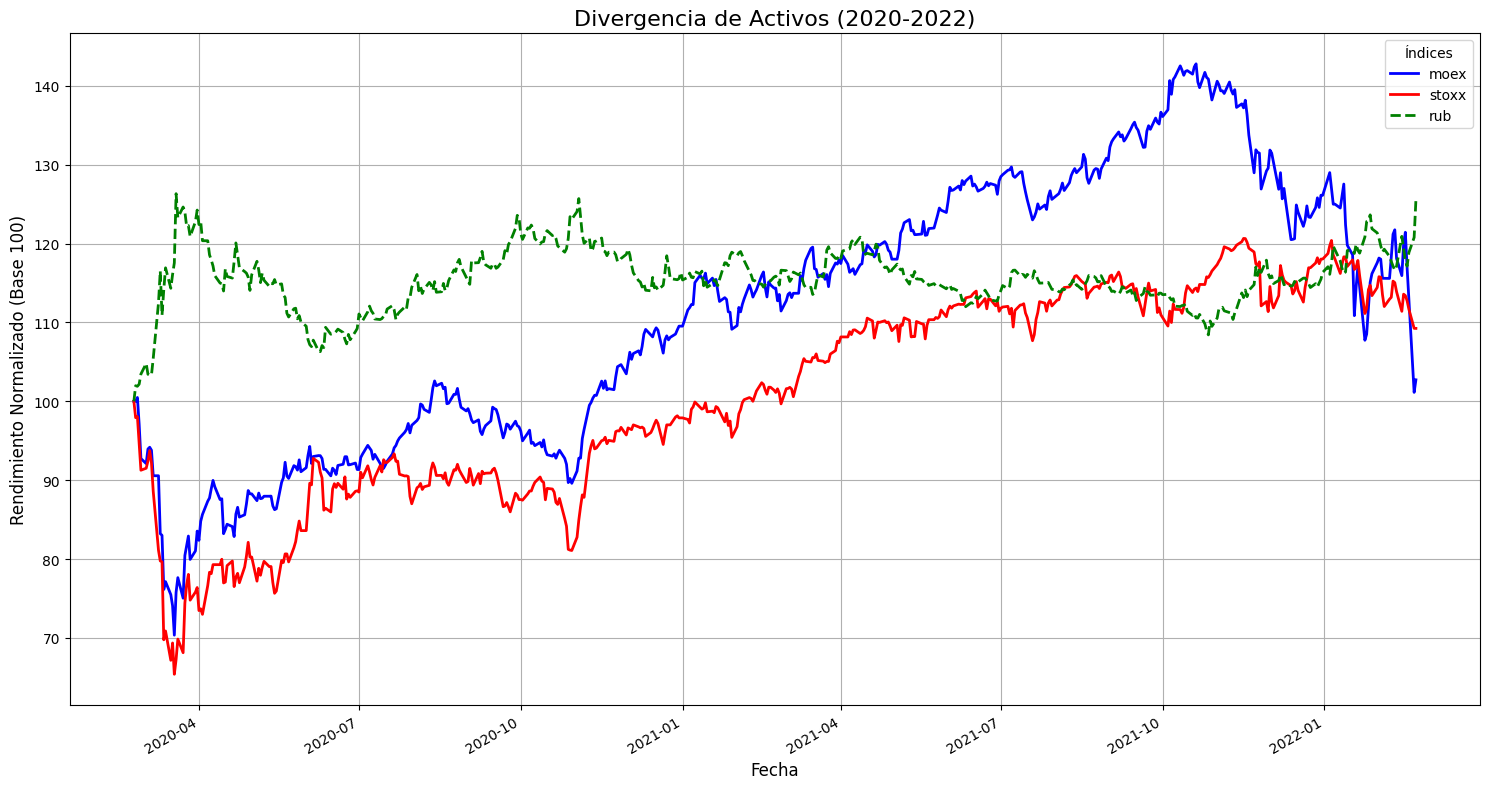

In [6]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['moex', 'stoxx', 'rub']

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos (2020-2022)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

## 6. Conclusiones

Este segundo caso de estudio refuerza contundentemente la hipótesis del proyecto, demostrando que los mercados pueden reflejar una tensión geopolítica creciente meses antes de que se materialice un conflicto.

Tras la recuperación sincronizada del crash de la COVID-19, se observa un claro punto de inflexión a partir de mediados de 2021, donde múltiples mercados comenzaron a emitir señales de alerta:

1. Señales de Impacto Estratégico (Energía y Alimentos):

    La señal más temprana y dramática provino del Gas Natural Europeo, cuyo precio inició una subida parabólica desde mediados de 2021, indicando que el mercado estaba valorando un altísimo riesgo de que Rusia utilizara la energía como arma geopolítica.

    Posteriormente, tanto el Petróleo Brent como el Trigo iniciaron una tendencia alcista, anticipando una disrupción en los mercados globales de energía y alimentos.

2. Señales de Origen (Activos Rusos):

    El índice MOEX se desacopló de sus pares europeos a finales de 2021, iniciando un desplome sostenido que reflejaba el pánico de los inversores ante el coste económico de una posible guerra (sanciones, aislamiento).

    El tipo de cambio RUB/USD confirmó esta tendencia, mostrando un claro debilitamiento del Rublo que se aceleró en las semanas previas a la invasión, consistente con una masiva fuga de capitales.

Por todo ello, se concluye que, para este caso, los mercados no solo anticiparon el conflicto, sino que también identificaron sus vectores de impacto clave (energía, alimentos) y el coste económico para el país iniciador con varios meses de antelación.